In [65]:
%matplotlib inline

import numpy as np

from collections       import defaultdict, Counter
from matplotlib        import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter

In [24]:
def data_generate(len_en,len_fr):
    data = []
    with open('data/text.en') as text_en, open('data/text.fr') as text_fr:
        for (line_en, line_fr) in zip(text_en, text_fr):
            data.append([len_en(line_en), len_fr(line_fr)])
    return np.array(data)

In [46]:
def plot_len_and_cor(data,unit_name):
    x, y = zip(*data)

    # define our basic units of length
    left     , width  = 0.1, 0.65
    bottom   , height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    # start with a rectangular figure
    plt.figure(1, figsize=(8, 8))

    main = plt.axes([left  , bottom  , width, height])
    hist_en = plt.axes([left  , bottom_h, width, 0.2   ])
    hist_fr = plt.axes([left_h, bottom  , 0.2  , height])

    # no labels
    nullfmt = NullFormatter()
    hist_en.xaxis.set_major_formatter(nullfmt)
    hist_fr.yaxis.set_major_formatter(nullfmt)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax    = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim      = (int(xymax/binwidth) + 1) * binwidth
    bins     = np.arange(0, lim + binwidth, binwidth)

    # plot the scatter plot
    main.scatter(x,y)
    main.set_xlim((0, lim))
    main.set_ylim((0, lim))
    main.set_xlabel('English sentence length (%s)' % (unit_name,))
    main.set_ylabel('Japanese sentence length (%s)' % (unit_name,))

    # plot the histograms
    hist_en.hist(sorted(x), bins=bins)
    hist_fr.hist(sorted(y), bins=bins, orientation='horizontal')
    hist_en.set_xlim(main.get_xlim())
    hist_fr.set_ylim(main.get_ylim())
    hist_en.set_ylabel('Counts')
    hist_fr.set_xlabel('Counts')

    # plot the correlation
    k = sum(x*y for x,y in data) / sum(x ** 2 for x,_ in data)
    print("Factor between Japanese and English sentence length is %0.2f" % (k,))
    main.plot([0,lim], [0,k*lim], color='red')

    plt.show()

There are 97643 and 143581 tokens in the English and Japanese data, respectively.
Factor between Japanese and English sentence length is 1.42


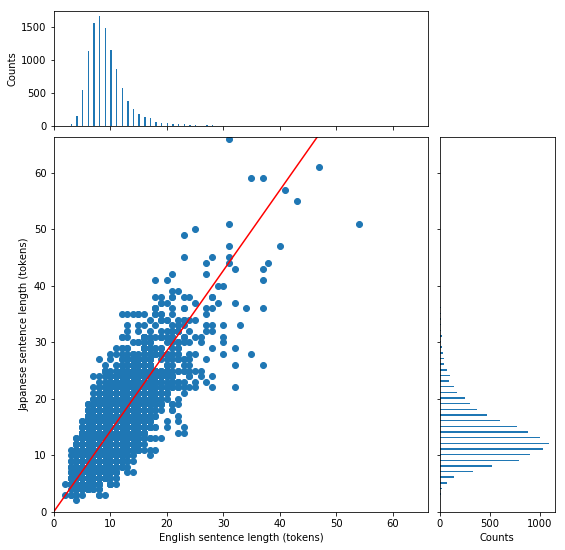

In [61]:
len_tok = lambda sent: len(sent.split(' '))
data = data_generate(len_tok,len_tok)
plot_len_and_cor(data,'tokens')

Factor between Japanese and English sentence length is 0.42


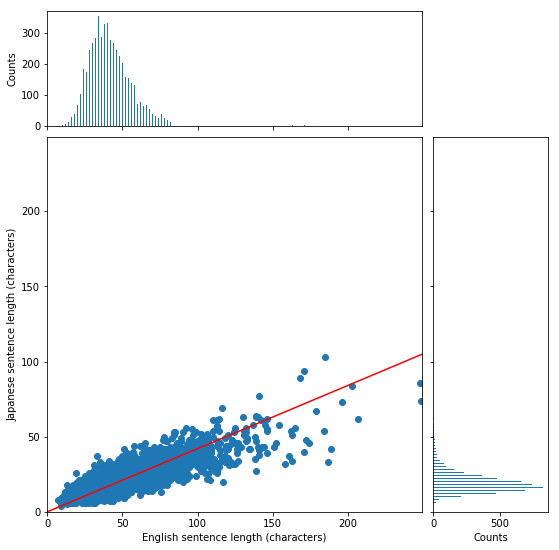

In [53]:
len_en_char = lambda sent: len(sent)
len_fr_char = lambda sent: len(sent.replace(' ',''))
data = data_generate(len_en_char,len_fr_char)
plot_len_and_cor(data,'characters')

In [62]:
def toks(fn):
    toks = list()
    with open(fn) as text:
        for line in text:
            toks.extend(set(line.split(' ')))
    return toks
   
def uniq_toks(fn):
    return set(toks(fn))

In [79]:
count_toks_en = Counter(toks('data/text.en'))
count_toks_fr = Counter(toks('data/text.fr'))

print("There are %d and %d tokens in the English and Japanese data, respectively." 
      % (sum(count_toks_en.values()), sum(count_toks_fr.values())))
print("There are %d and %d unique tokens in the English and Japanese data, respectively." 
      % (len(count_toks_en), len(count_toks_fr)))

There are 94428 and 134517 tokens in the English and Japanese data, respectively.
There are 7217 and 8256 unique tokens in the English and Japanese data, respectively.


In [202]:
def plot_cnt_and_frq(cnt):
    data = sorted(cnt.values(), reverse=True)
    plt.figure(1, figsize=(12,8))
    
    hist_dec = plt.axes([0.0, 0.55, 1.0, 0.45])
    hist_dec.plot(data_en)
    hist_dec.set_ylabel("number of incidences")
    hist_dec.set_xlabel("$x$th most common token", usetex=True)
    
    hist_inv = plt.axes([0.0, 0.0, 1.0, 0.45])
    hist_inv.hist(hist_en, bins=np.logspace(1, 4, 30))
    hist_inv.set_xscale("log")
    hist_inv.set_xlabel("number of incidences")
    hist_inv.set_ylabel("number of tokens with $x$ indicences", usetex=True)
    plt.show()

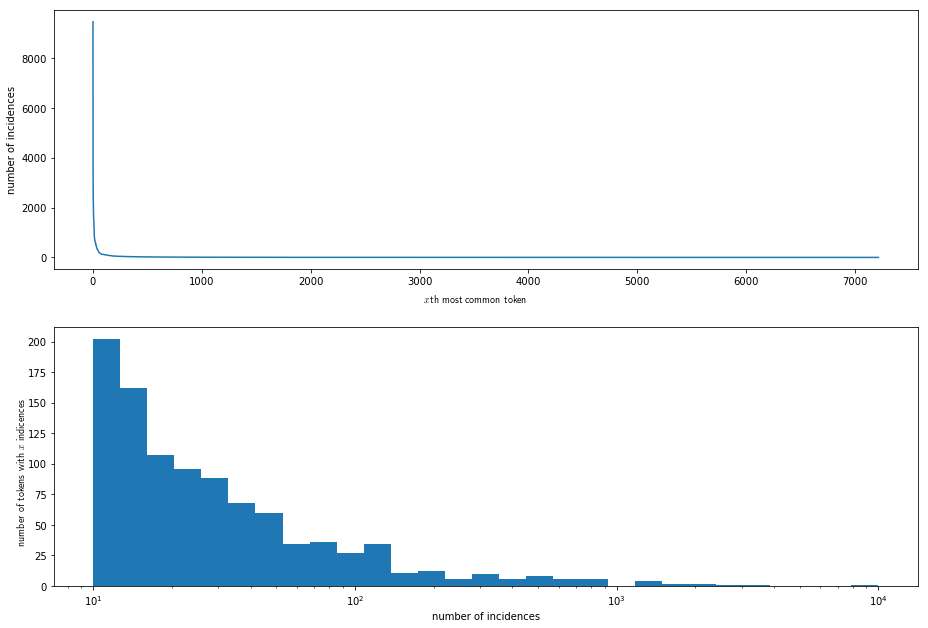

In [203]:
plot_cnt_and_frq(count_toks_en)

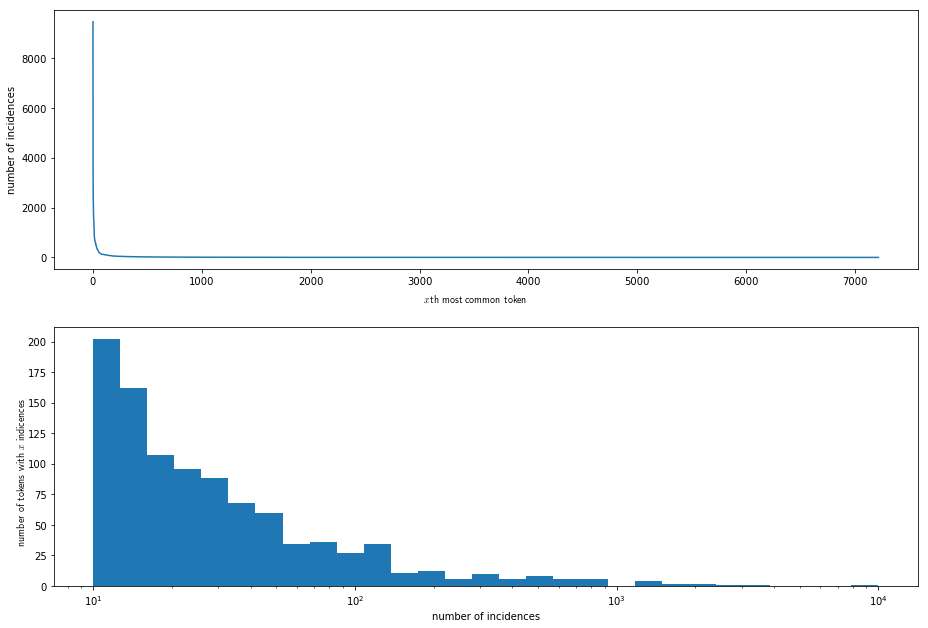

In [204]:
plot_cnt_and_frq(count_toks_fr)